<a href="https://colab.research.google.com/github/AVU7/EPOCH_PS1_mithu/blob/main/Dala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, Flatten
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the WAV file
audio_path = 'LJ037-0171.wav'
y, sr = librosa.load(audio_path)

# Compute the mel spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram_norm = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db))

# Reshape the spectrogram to match the input shape of your GAN
spectrogram_input = np.expand_dims(spectrogram_norm, axis=0)  # Add batch dimension
spectrogram_input = np.expand_dims(spectrogram_input, axis=-1)  # Add channel dimension

# Define your GAN architecture
generator = Sequential([
    Dense(128 * 128 * 64, input_dim=100),
    Reshape((128, 128, 64)),
    Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')
])

# Generate a fake spectrogram
fake_spectrogram = generator.predict(np.random.randn(1, 100))

# Assuming the rest of your GAN code is set up (e.g., discriminator, training loop), you can use the fake spectrogram in your GAN


1/1 [==============================] - 1s 1s/step


In [14]:
import soundfile as sf

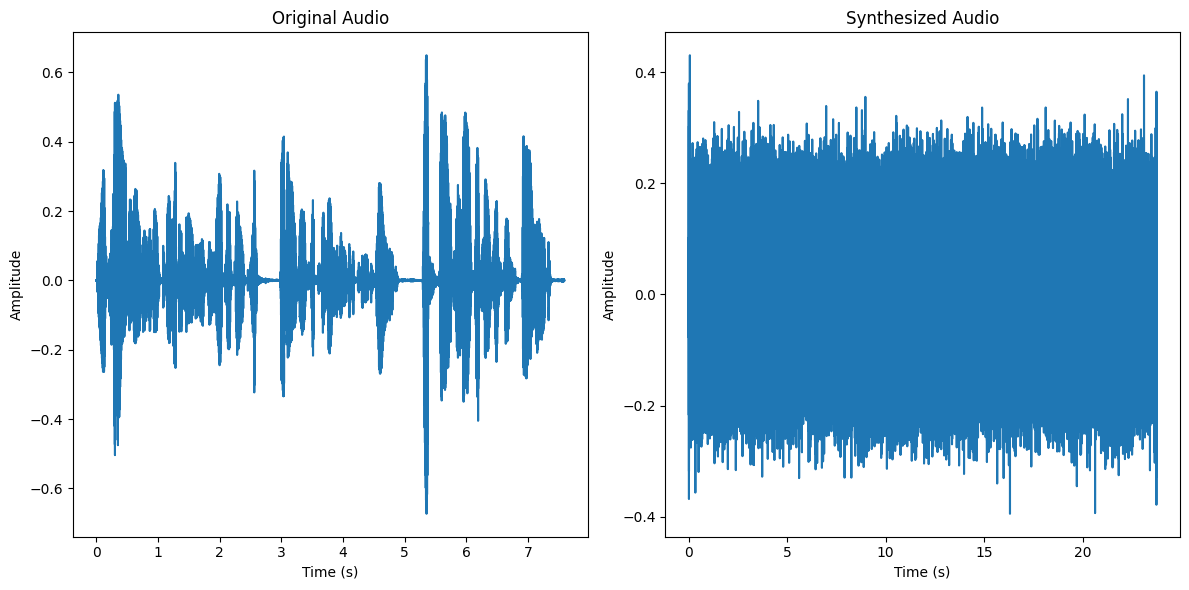

In [22]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Assuming fake_spectrogram is the generated spectrogram from your GAN
# Assuming sr is the sample rate used in the original audio file
# You may need to adjust these values based on your actual GAN and audio parameters

# Convert the Mel spectrogram back to a linear spectrogram
spectrogram_linear = librosa.feature.inverse.mel_to_stft(fake_spectrogram.squeeze())

# Invert the linear spectrogram to obtain the audio waveform
audio_synthesized = librosa.griffinlim(spectrogram_linear)

# Save the synthesized audio to a WAV file
output_path = 'synthesized_audio.wav'
sf.write(output_path, audio_synthesized, sr)
# Plot the original and synthesized audio signals (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Audio')
plt.plot(np.arange(len(y)) / sr, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(1, 2, 2)
plt.title('Synthesized Audio')
plt.plot(np.arange(len(audio_synthesized)) / sr, audio_synthesized)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


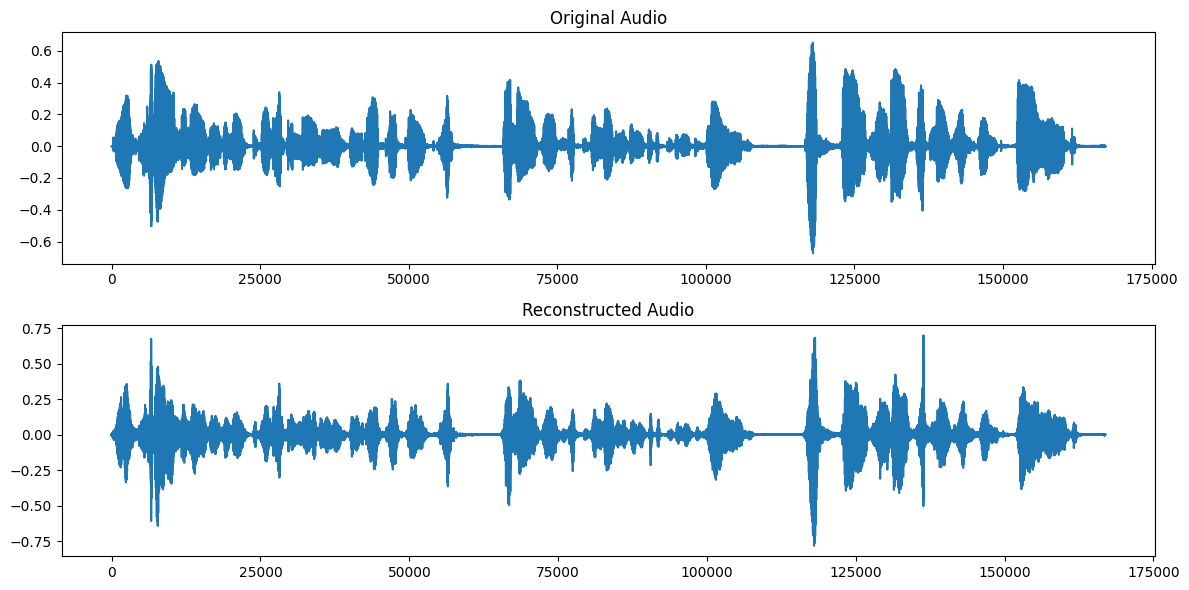

In [32]:


import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the original audio file
original_audio_path =  'LJ037-0171.wav'
y, sr = librosa.load(original_audio_path)

# Compute the mel spectrogram of the original audio
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Invert the mel spectrogram back to a waveform
reconstructed_audio = librosa.feature.inverse.mel_to_audio(spectrogram)

# Save the reconstructed audio to a new WAV file
reconstructed_audio_path = 'path_to_your_reconstructed_audio_file.wav'
sf.write(reconstructed_audio_path, reconstructed_audio, sr)


# Plot the original and reconstructed audio signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Audio')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_audio)
plt.title('Reconstructed Audio')
plt.tight_layout()
plt.show()
